<a href="https://colab.research.google.com/github/AnastasiaShynkarenko/AnastasiaShynkarenko.github.io/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
from keras.datasets import mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Розмірність навчального набору зображень:", train_images.shape)
print("Розмірність навчального набору міток:", train_labels.shape)
print("Розмірність тестового набору зображень:", test_images.shape)
print("Розмірність тестового набору міток:", test_labels.shape)

Розмірність навчального набору зображень: (60000, 28, 28)
Розмірність навчального набору міток: (60000,)
Розмірність тестового набору зображень: (10000, 28, 28)
Розмірність тестового набору міток: (10000,)


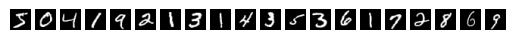

In [ ]:
import matplotlib.pyplot as plt
for i in range(20):
    plt.subplot(1, 20, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from sklearn.linear_model import LogisticRegression

train_images_flat = train_images.reshape((-1, 784))
test_images_flat = test_images.reshape((-1, 784))

model = LogisticRegression(solver='lbfgs', max_iter=100)

model.fit(train_images_flat, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

test_images_flat = test_images.reshape(test_images.shape[0], -1)

y_pred = model.predict(test_images_flat)

accuracy = model.score(test_images_flat, test_labels)
print(f'Тестова точність: {accuracy * 100:.2f}%')


Тестова точність: 92.58%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_images_flat = test_images.reshape(test_images.shape[0], -1)
y_pred = model.predict(test_images_flat)

accuracy = accuracy_score(test_labels, y_pred)
print(f'Тестова точність: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, y_pred)
print('Матриця плутанини:')
print(conf_matrix)

class_report = classification_report(test_labels, y_pred)
print('Звіт:')
print(class_report)


Тестова точність: 92.58%
Матриця плутанини:
[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   23    6    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]
Звіт:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

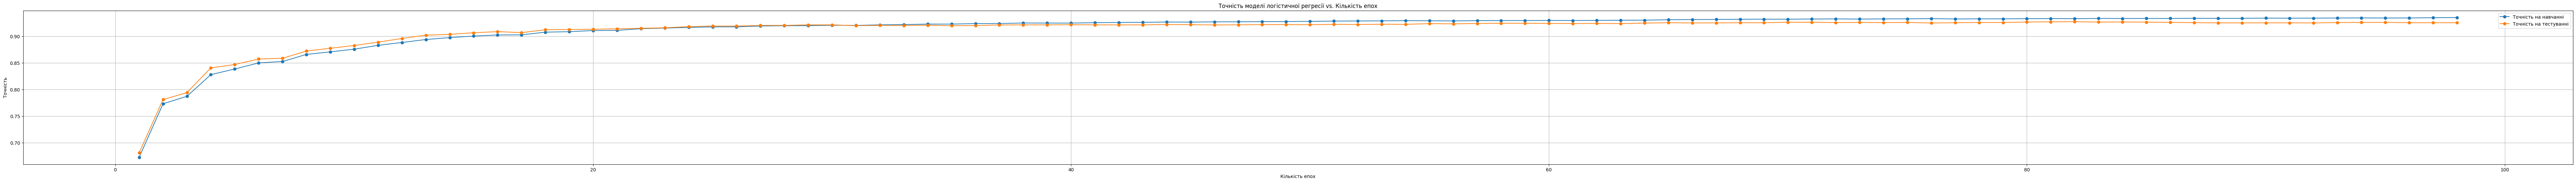

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

train_accuracy = []
test_accuracy = []

epochs_range = range(1, 99)

for num_epochs in epochs_range:

    model.max_iter = num_epochs
    model.fit(train_images_flat, train_labels)

    train_accuracy.append(model.score(train_images_flat, train_labels))
    test_accuracy.append(model.score(test_images_flat, test_labels))

plt.figure(figsize=(99, 6))
plt.plot(epochs_range, train_accuracy, marker='o', label='Точність на навчанні')
plt.plot(epochs_range, test_accuracy, marker='o', label='Точність на тестуванні')
plt.xlabel('Кількість епох')
plt.ylabel('Точність')
plt.title('Точність моделі логістичної регресії vs. Кількість епох')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

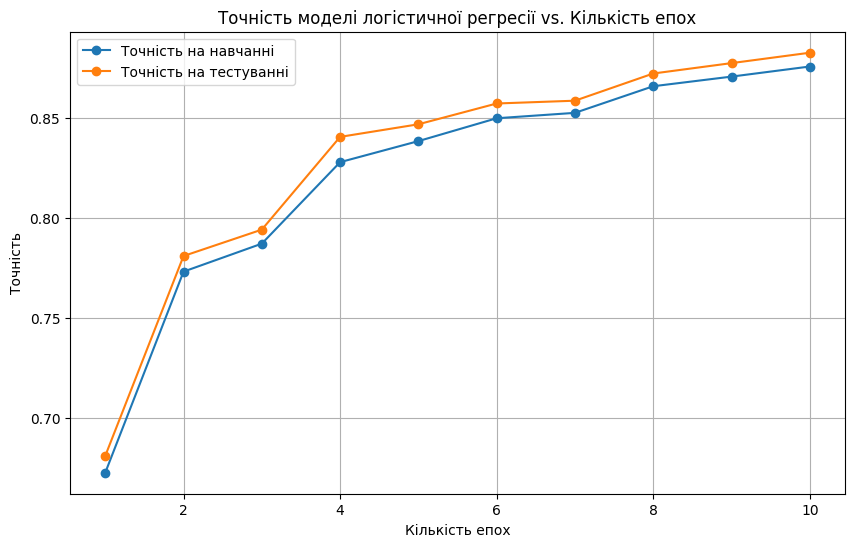

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

train_accuracy = []
test_accuracy = []

epochs_range = range(1, 11)

for num_epochs in epochs_range:
    model.max_iter = num_epochs
    model.fit(train_images_flat, train_labels)
    train_accuracy.append(model.score(train_images_flat, train_labels))
    test_accuracy.append(model.score(test_images_flat, test_labels))

plt.figure(figsize=(10, 6))

plt.plot(epochs_range, train_accuracy, marker='o', label='Точність на навчанні')
plt.plot(epochs_range, test_accuracy, marker='o', label='Точність на тестуванні')

plt.xlabel('Кількість епох')
plt.ylabel('Точність')
plt.title('Точність моделі логістичної регресії vs. Кількість епох')

plt.legend()
plt.grid(True)

plt.show()

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


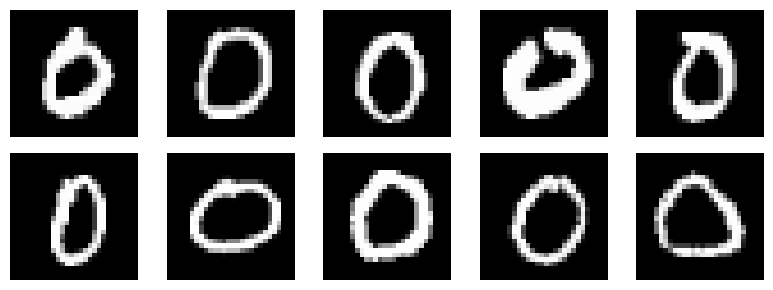

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


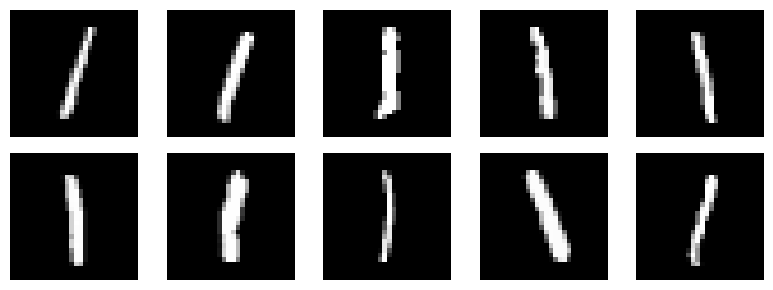

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


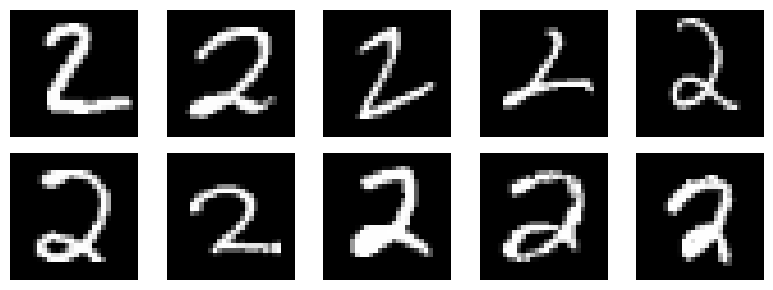

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


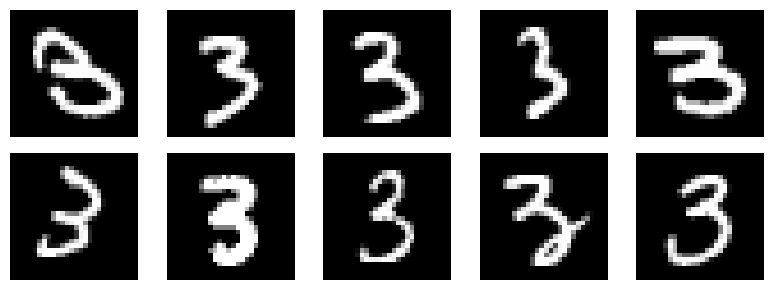

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


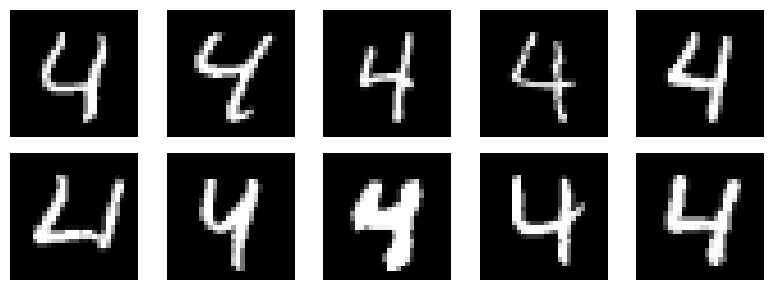

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


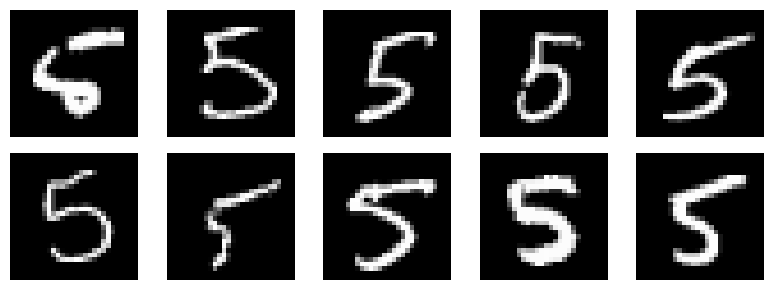

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


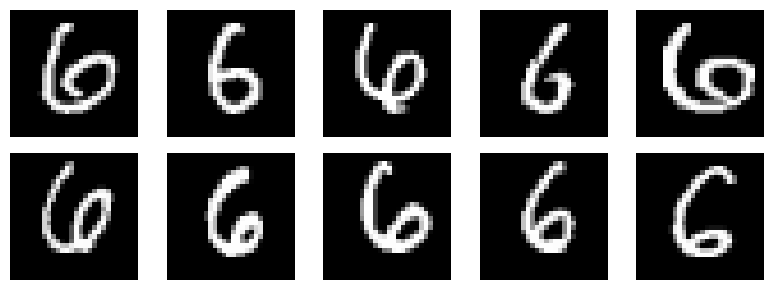

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


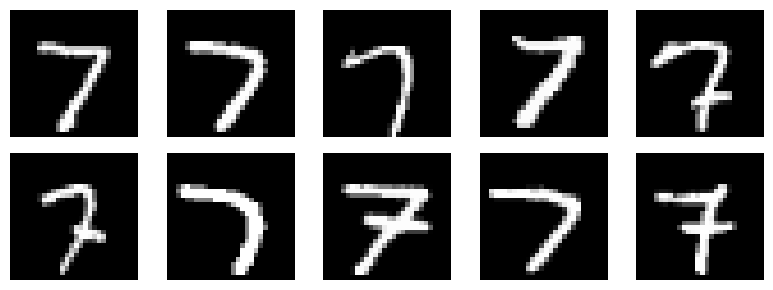

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


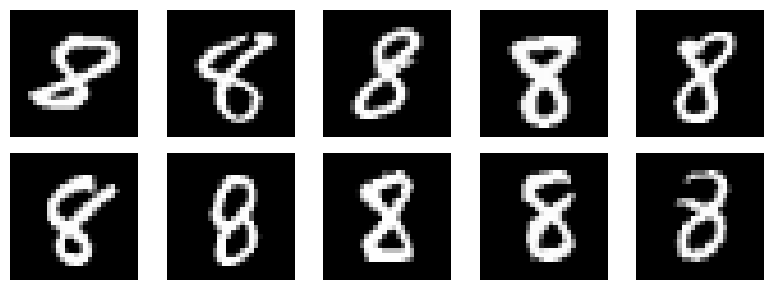

<ipython-input-26-79a1dbde4a02>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


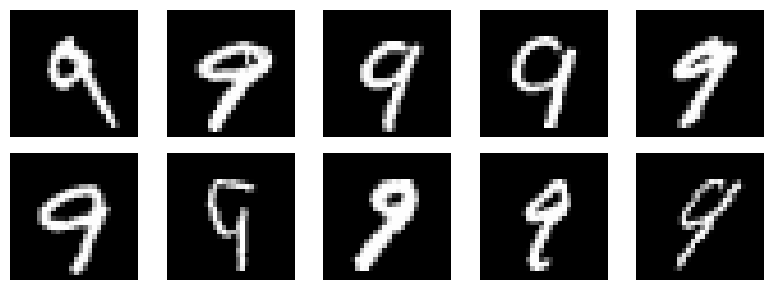

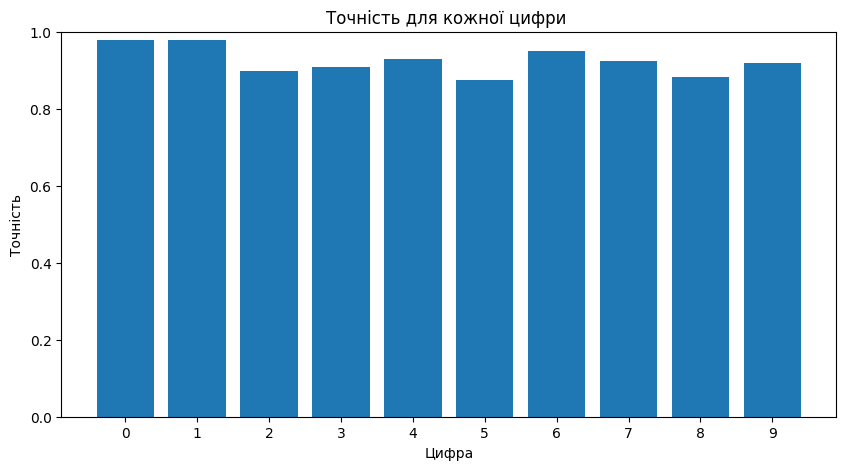

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(test_images_flat)

accuracy_per_digit = []
for digit in range(10):
    digit_indices = np.where(test_labels == digit)[0]
    digit_accuracy = accuracy_score(test_labels[digit_indices], y_pred[digit_indices])
    accuracy_per_digit.append(digit_accuracy)

    plt.figure(figsize=(8, 3))
    plt.title(f"Цифра {digit}, Точність: {digit_accuracy * 100:.2f}%")
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[digit_indices[i]], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(10), accuracy_per_digit)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Цифра')
plt.ylabel('Точність')
plt.title('Точність для кожної цифри ')
plt.ylim(0, 1)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

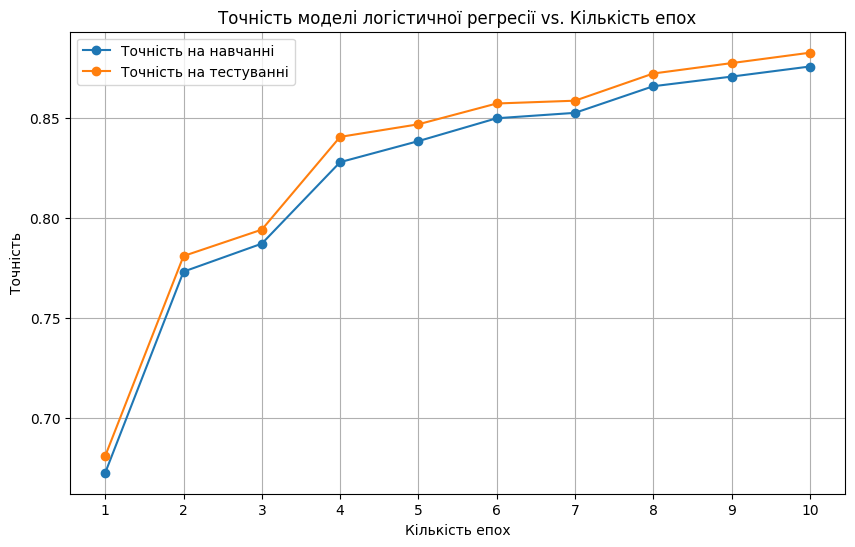

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

train_accuracy = []
test_accuracy = []

epochs_range = range(1, 11)

for num_epochs in epochs_range:
    model.max_iter = num_epochs
    model.fit(train_images_flat, train_labels)
    train_accuracy.append(model.score(train_images_flat, train_labels))
    test_accuracy.append(model.score(test_images_flat, test_labels))

plt.figure(figsize=(10, 6))

plt.plot(epochs_range, train_accuracy, marker='o', label='Точність на навчанні')
plt.plot(epochs_range, test_accuracy, marker='o', label='Точність на тестуванні')

plt.xlabel('Кількість епох')
plt.ylabel('Точність')
plt.title('Точність моделі логістичної регресії vs. Кількість епох')

plt.legend()
plt.grid(True)

plt.xticks(epochs_range)

plt.show()
